In [1]:
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
X = np.array(([3,5], [5,1], [10,2]), dtype=float)
y = np.array(([75],[82], [93]), dtype=float)

In [3]:
X = X/np.amax(X, axis=0)
y = y/100 #Max test score is 100

In [4]:
print(X)
print(y)

[[ 0.3  1. ]
 [ 0.5  0.2]
 [ 1.   0.4]]
[[ 0.75]
 [ 0.82]
 [ 0.93]]


In [5]:
def sigmoid(z):
    #Apply sigmoid activation function to scalar, vector, or matrix
    return 1/(1+np.exp(-z))

In [6]:
class Neural_Network(object):
    def __init__(self):        
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)
        print('W1',self.W1)
        print('W2',self.W2)
            
    def forward(self, X):
        #Propagate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        print(self.z2)
        print(self.a2)
        print(self.z3)
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))

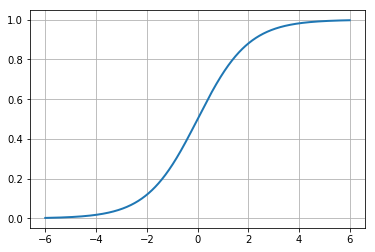

In [7]:
testInput = np.arange(-6,6,0.01)
plot(testInput, sigmoid(testInput), linewidth= 2)
grid(1)

In [8]:
net = Neural_Network()

W1 [[-1.01307777 -0.49216542  0.99647051]
 [-1.07846925  0.4694706   0.63347345]]
W2 [[ 0.30420096]
 [-0.60470947]
 [ 1.35138432]]


In [9]:
net.forward(X)

[[-1.38239258  0.32182097  0.9324146 ]
 [-0.72223274 -0.15218859  0.62492995]
 [-1.44446547 -0.30437718  1.24985989]]
[[ 0.20062502  0.57976797  0.7175649 ]
 [ 0.32690151  0.46202612  0.65133896]
 [ 0.1908548   0.4244878   0.77727561]]
[[ 0.68014509]
 [ 0.70026144]
 [ 0.85176449]]


array([[ 0.66377108],
       [ 0.66824573],
       [ 0.70093715]])

In [10]:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
    
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [11]:
NN = Neural_Network()

In [12]:
cost1 = NN.costFunction(X,y)

In [13]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)

In [14]:
dJdW1, dJdW2

(array([[-0.02695911,  0.10943066, -0.01200103],
        [-0.0212506 ,  0.08514805, -0.00988679]]), array([[-0.16358448],
        [-0.17399429],
        [-0.21765968]]))

In [15]:
scalar = 3
NN.W1 = NN.W1 + scalar*dJdW1
NN.W2 = NN.W2 + scalar*dJdW2
cost2 = NN.costFunction(X,y)

In [16]:
print (cost1, cost2)

0.372013320808 0.727572379644


In [17]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)
NN.W1 = NN.W1 - scalar*dJdW1
NN.W2 = NN.W2 - scalar*dJdW2
cost3 = NN.costFunction(X, y)

In [18]:
print (cost2, cost3)

0.727572379644 0.453396926337


In [19]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)
NN.W1 = NN.W1 - scalar*dJdW1
NN.W2 = NN.W2 - scalar*dJdW2
cost3 = NN.costFunction(X, y)

In [20]:
print (cost2, cost3)

0.727572379644 0.13398760473


In [21]:
from scipy import optimize

In [22]:
class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))   
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, X, y):
        #Make an internal variable for the callback function:
        self.X = X
        self.y = y

        #Make empty list to store costs:
        self.J = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(X, y), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [23]:
NN = Neural_Network()

In [24]:
T = trainer(NN)

In [25]:
T.train(X,y)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 40
         Function evaluations: 41
         Gradient evaluations: 41


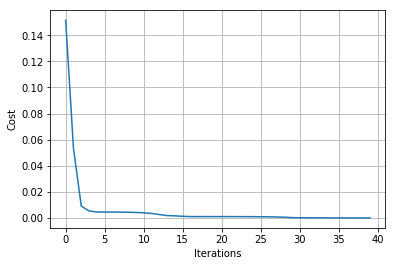

In [26]:
plot(T.J)
grid(1)
xlabel('Iterations')
ylabel('Cost')

In [27]:
NN.costFunctionPrime(X,y)

(array([[ -6.18702969e-08,   2.45740580e-07,  -1.06739157e-07],
        [ -1.95729629e-07,   5.81819330e-07,  -3.44699963e-07]]),
 array([[ -6.14597837e-07],
        [ -1.67590261e-07],
        [ -5.69996822e-07]]))

In [28]:
NN.forward(X)

array([[ 0.74999627],
       [ 0.82000043],
       [ 0.92999688]])

In [29]:
y

array([[ 0.75],
       [ 0.82],
       [ 0.93]])

In [30]:
#Test network for various combinations of sleep/study:
hoursSleep = linspace(0, 10, 100)
hoursStudy = linspace(0, 5, 100)

#Normalize data (same way training data way normalized)
hoursSleepNorm = hoursSleep/10.
hoursStudyNorm = hoursStudy/5.

#Create 2-d versions of input for plotting
a, b  = meshgrid(hoursSleepNorm, hoursStudyNorm)

#Join into a single input matrix:
allInputs = np.zeros((a.size, 2))
allInputs[:, 0] = a.ravel()
allInputs[:, 1] = b.ravel()

In [31]:
allOutputs = NN.forward(allInputs)

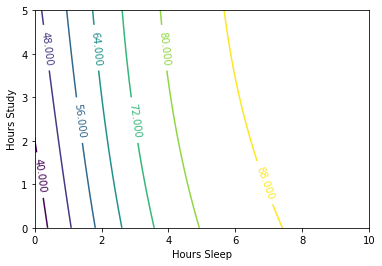

In [32]:
#Contour Plot:
yy = np.dot(hoursStudy.reshape(100,1), np.ones((1,100)))
xx = np.dot(hoursSleep.reshape(100,1), np.ones((1,100))).T

CS = contour(xx,yy,100*allOutputs.reshape(100, 100))
clabel(CS, inline=1, fontsize=10)
xlabel('Hours Sleep')
ylabel('Hours Study')

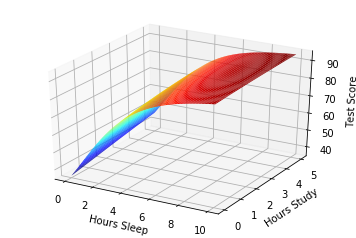

In [33]:
#3D plot:

##Uncomment to plot out-of-notebook (you'll be able to rotate)
#%matplotlib qt

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(xx, yy, 100*allOutputs.reshape(100, 100), \
                       cmap=cm.jet)

ax.set_xlabel('Hours Sleep')
ax.set_ylabel('Hours Study')
ax.set_zlabel('Test Score')